Pontok száma: (457, 3)


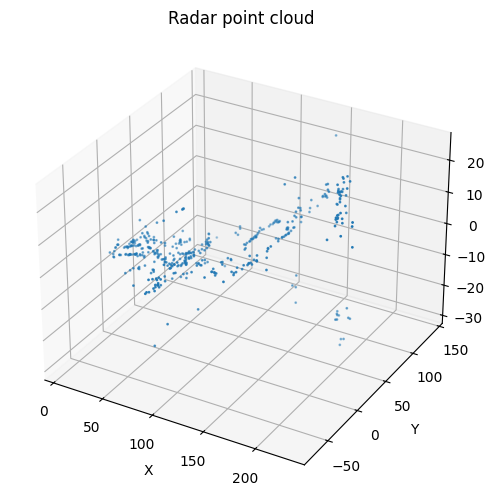

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from pypcd4 import PointCloud

# 🔹 PCD fájl betöltése
pcd_path = r"C:\Users\janko\Downloads\INFRA-3DRC-Dataset\INFRA-3DRC_scene-01\radar_01\radar_01__data\radar_01__2023-07-06-18-58-36-487.pcd"
pc = PointCloud.from_path(pcd_path)

# 🔹 Pontok numpy formátumban
points = np.vstack((pc.pc_data['x'], pc.pc_data['y'], pc.pc_data['z'])).T
print("Pontok száma:", points.shape)

# 🔹 3D ábra
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(points[:,0], points[:,1], points[:,2], s=1)
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")
plt.title("Radar point cloud")
plt.show()



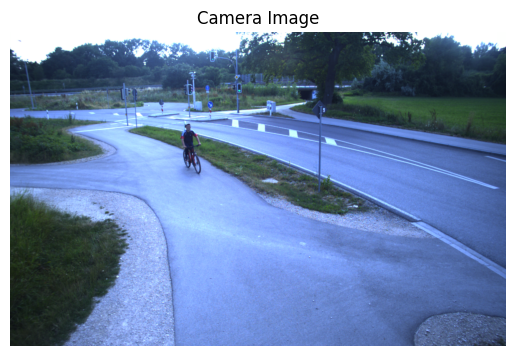

In [2]:
import cv2

img_path = r"C:\Users\janko\Downloads\INFRA-3DRC-Dataset\INFRA-3DRC_scene-01\camera_01\camera_01__data\camera_01__2023-07-06-18-58-38-185.png"
img = cv2.imread(img_path)
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.imshow(img_rgb)
plt.axis("off")
plt.title("Camera Image")
plt.show()


In [6]:
#scene_dir = r"C:\Users\janko\Downloads\INFRA-3DRC-Dataset\INFRA-3DRC_scene-01"
#print(os.listdir(scene_dir))


In [7]:
import json

calib_path = r"C:\Users\janko\Downloads\INFRA-3DRC-Dataset\INFRA-3DRC_scene-01\calibration.json"

with open(calib_path, 'r') as f:
    calib = json.load(f)

# Nézzük meg az első pár kulcsot:
print(calib.keys())


dict_keys(['calibration'])


In [8]:
# Nézd meg, hány elem van a listában:
print(f"Elemek száma a 'calibration' listában: {len(calib['calibration'])}")

# Nézd meg az ELSŐ elem kulcsait (ami valószínűleg az első szótár):
# A [0] azt jelenti, hogy a lista első eleméhez (szótárához) férünk hozzá.
print(f"Az első elem kulcsai: {calib['calibration'][0].keys()}")

Elemek száma a 'calibration' listában: 5
Az első elem kulcsai: dict_keys(['calibration', 'calibration_type', 'T'])


In [9]:
calibration_list = calib['calibration']

print("--- Minden 'calibration_type' a fájlban: ---")
for i, item in enumerate(calibration_list):
    print(f"Index {i}: {item.get('calibration_type', 'Nincs Típus Megadva')}")


--- Minden 'calibration_type' a fájlban: ---
Index 0: extrinsic
Index 1: extrinsic
Index 2: extrinsic
Index 3: extrinsic
Index 4: intrinsic


In [10]:
calibration_list = calib['calibration']

print("--- Kulcsok a lista elemeiben ---")
for i, item in enumerate(calibration_list):
    # Kiírjuk minden elem kulcsait, hogy lássuk, van-e azonosító kulcs
    print(f"Index {i} kulcsai: {item.keys()}")

--- Kulcsok a lista elemeiben ---
Index 0 kulcsai: dict_keys(['calibration', 'calibration_type', 'T'])
Index 1 kulcsai: dict_keys(['calibration', 'calibration_type', 'T'])
Index 2 kulcsai: dict_keys(['calibration', 'calibration_type', 'T'])
Index 3 kulcsai: dict_keys(['calibration', 'calibration_type', 'T'])
Index 4 kulcsai: dict_keys(['calibration', 'calibration_type', 'k', 'D'])


In [11]:
calibration_list = calib['calibration']

print("--- Extrinzikus Kalibrációk Azonosító Stringjei ---")
for i in range(4): 
    # Az 'extrinsic_data' most már egy string!
    sensor_identifier = calibration_list[i]['calibration'] 
    
    # Kiírjuk, mi az azonosító string
    print(f"Index {i}: {sensor_identifier}")

--- Extrinzikus Kalibrációk Azonosító Stringjei ---
Index 0: lidar_01_to_camera_01
Index 1: radar_01_to_camera_01
Index 2: lidar_01_to_ground
Index 3: radar_01_to_lidar_01


In [12]:
intrinsic_data = calib['calibration'][4]
print("--- Index 4 (Intrinzikus) Adatainak Belső Ellenőrzése ---")

# Kiírjuk az összes kulcsot, ami a 4-es indexű bejegyzésben van
print(f"Index 4 kulcsai: {intrinsic_data.keys()}")

# Megpróbáljuk kinyomtatni a 'calibration' kulcs tartalmát (ami már tudjuk, hogy string)
print(f"Tartalom a 'calibration' kulcs alatt: {intrinsic_data['calibration']}")

# Megnézzük, van-e a gyökérben 'width' vagy 'height' kulcs
print(f"Van-e 'width' kulcs a gyökérben: {'width' in intrinsic_data}")

--- Index 4 (Intrinzikus) Adatainak Belső Ellenőrzése ---
Index 4 kulcsai: dict_keys(['calibration', 'calibration_type', 'k', 'D'])
Tartalom a 'calibration' kulcs alatt: camera_01
Van-e 'width' kulcs a gyökérben: False


In [13]:
import numpy as np
import json
from pypcd4 import PointCloud
# matplotlib.pyplot nem szükséges a vetítéshez, de benne hagyható, ha rajzolni is akarsz.

# --- 1. Adathalmaz útvonalak és kalibráció betöltése ---
calib_path = r"C:\Users\janko\Downloads\INFRA-3DRC-Dataset\INFRA-3DRC_scene-01\calibration.json"
pcd_path = r"C:\Users\janko\Downloads\INFRA-3DRC-Dataset\INFRA-3DRC_scene-01\radar_01\radar_01__data\radar_01__2023-07-06-18-58-36-487.pcd"

# Kalibráció betöltése
with open(calib_path, 'r') as f:
    calib = json.load(f)
    
calibration_list = calib['calibration']

# --- 2. Radar Pontfelhő Betöltése (PCD fájl alapján) ---
pc = PointCloud.from_path(pcd_path)
# A betöltött 3D pontok (x, y, z)
points_radar = np.vstack((pc.pc_data['x'], pc.pc_data['y'], pc.pc_data['z'])).T
N = points_radar.shape[0]
print(f"Betöltött radar pontok száma: {N}")


# --- 3. Kalibrációs Mátrixok Betöltése (a korábban azonosított indexekkel) ---
# Kézi beállítás a kép felbontásához
WIDTH = 1920 
HEIGHT = 1216
print(f"Kép méretek manuálisan beállítva: {WIDTH}x{HEIGHT}")

# 3.1. Intrinzikus Mátrix (K) Betöltése (Index 4)
intrinsic_data = calibration_list[4]
K = np.array(intrinsic_data['k']).reshape((3, 3)) 

# 3.2. Extrinzikus Mátrix (Radar -> Kamera) Betöltése (Index 1)
extrinsic_data = calibration_list[1]
T_radar_to_cam = np.array(extrinsic_data['T']) 

print("✅ Kalibrációs mátrixok sikeresen betöltve!")


# --- 4. Radar Pontok Vetítése a Kép Síkjára ---

# 4.1. Extrinzikus Transzformáció (Radar Koordináta --> Kamera Koordináta)
points_hom_radar = np.hstack([points_radar, np.ones((N, 1))])
points_hom_cam = (T_radar_to_cam @ points_hom_radar.T).T 
points_cam = points_hom_cam[:, :3] # x_cam, y_cam, z_cam

# 4.2. Intrinzikus Vetítés (3D --> 2D Pixel Koordináta)
x_cam = points_cam[:, 0]
y_cam = points_cam[:, 1]
z_cam = points_cam[:, 2] 

# Szűrés 1: Csak a kamera előtt lévő pontokra (Z > 0)
valid_indices = z_cam > 0.1 
x_valid = x_cam[valid_indices]
y_valid = y_cam[valid_indices]
z_valid = z_cam[valid_indices]

# Vetítés a 2D képkoordinátákra (u, v)
u = K[0, 0] * (x_valid / z_valid) + K[0, 2] 
v = K[1, 1] * (y_valid / z_valid) + K[1, 2] 

# Szűrés 2: Lekerekítés és Képhatáron belüli szűrés
u = np.round(u).astype(int)
v = np.round(v).astype(int)
on_image_indices = (u >= 0) & (u < WIDTH) & (v >= 0) & (v < HEIGHT)

u_final = u[on_image_indices]
v_final = v[on_image_indices]

print(f"\nSikeresen vetített, képen megjeleníthető radar pontok: {len(u_final)}/{N} db")
# Ezen pontok (u_final, v_final) készen állnak a kameraképen való megjelenítésre.

Betöltött radar pontok száma: 457
Kép méretek manuálisan beállítva: 1920x1216
✅ Kalibrációs mátrixok sikeresen betöltve!

Sikeresen vetített, képen megjeleníthető radar pontok: 410/457 db


✅ 410 db radar pont rárajzolva a képre.


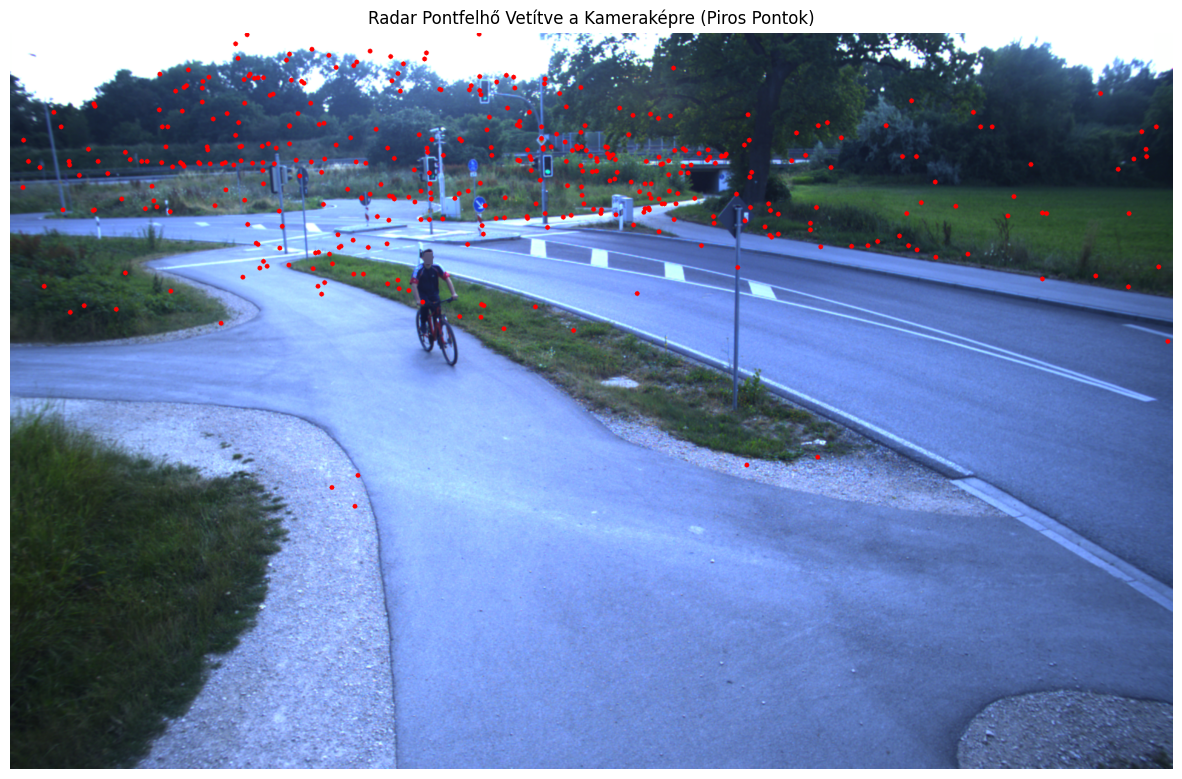

In [14]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

# A feltételezés, hogy a következő változók már léteznek:
# - u_final: A vetített horizontális pixel koordináták (NumPy tömb)
# - v_final: A vetített vertikális pixel koordináták (NumPy tömb)

# --- 1. Kamerakép Betöltése ---
img_path = r"C:\Users\janko\Downloads\INFRA-3DRC-Dataset\INFRA-3DRC_scene-01\camera_01\camera_01__data\camera_01__2023-07-06-18-58-38-185.png"

# Kép betöltése (OpenCV BGR formátumban)
img = cv2.imread(img_path)

if img is None:
    raise FileNotFoundError(f"Hiba: Nem sikerült betölteni a képet: {img_path}")

# --- 2. Pontok Rajzolása a Képre (OpenCV használatával) ---

# Kombináljuk a koordinátákat egy listává (OpenCV rajzoláshoz könnyebb)
points_2d = np.stack([u_final, v_final], axis=1)

# Pontok rajzolása a képre
for u, v in points_2d:
    # cv2.circle paraméterek:
    # 1. Kép, amire rajzolunk (img)
    # 2. Középpont (u, v)
    # 3. Sugár (pl. 4 pixel)
    # 4. Szín (BGR: (0, 0, 255) = Piros)
    # 5. Vastagság (-1 = kitöltött kör)
    cv2.circle(img, (u, v), 4, (0, 0, 255), -1) 
    
print(f"✅ {len(u_final)} db radar pont rárajzolva a képre.")


# --- 3. Kép Megjelenítése (Matplotlib használatával) ---

# Átalakítás BGR-ből RGB-be (Matplotlib-nek szüksége van rá)
img_rgb_final = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(15, 10)) # Nagyobb méret a megjelenítéshez
plt.imshow(img_rgb_final)
plt.axis("off")
plt.title("Radar Pontfelhő Vetítve a Kameraképre (Piros Pontok)")
plt.show()

In [15]:
import json
# scene_path betöltése:
scene_path = r"C:\Users\janko\Downloads\INFRA-3DRC-Dataset\INFRA-3DRC_scene-01\scene.json" 
with open(scene_path, 'r') as f:
    scene_data = json.load(f)

print("--- A scene.json fájl fő kulcsai: ---")
print(scene_data.keys())

--- A scene.json fájl fő kulcsai: ---
dict_keys(['location', 'weather', 'day_light', 'description', 'info', 'total_frames_count'])


In [16]:
import json
import os

# FONTOS: Kérlek egészítsd ki a fájlnevet a VALÓS KITERJESZTÉSÉVEL (.json, .txt, .csv)!
# Feltételezzük, hogy ez egy JSON fájl.
ANNOTATION_FILENAME = "camera_01__2023-07-06-18-58-35-252.json" 
ANNOTATION_DIR = r"C:\Users\janko\Downloads\INFRA-3DRC-Dataset\INFRA-3DRC_scene-01\camera_01\camera_01__annotation"

annotation_file_path = os.path.join(ANNOTATION_DIR, ANNOTATION_FILENAME)

if os.path.exists(annotation_file_path):
    try:
        with open(annotation_file_path, 'r') as f:
            annotation_data = json.load(f)
            
        print(f"--- Annotációs fájl fő kulcsai ({ANNOTATION_FILENAME}) ---")
        
        # Ha az adat egy lista, megnézzük az első elem kulcsait
        if isinstance(annotation_data, list) and len(annotation_data) > 0:
            print(f"Lista 1. elemének kulcsai: {annotation_data[0].keys()}")
        # Ha az adat egy szótár, megnézzük a kulcsait
        elif isinstance(annotation_data, dict):
            print(f"Fő szótár kulcsai: {annotation_data.keys()}")
        else:
            print("Az annotációs fájl tartalma nem szótár vagy lista, ellenőrizd a formátumot!")

    except json.JSONDecodeError:
        print(f"HIBA: Az annotációs fájl ({ANNOTATION_FILENAME}) nem érvényes JSON formátum. Lehet, hogy TXT, CSV, vagy valami más?")
        
else:
    print(f"HIBA: Nem található a fájl ezen az útvonalon: {annotation_file_path}")

--- Annotációs fájl fő kulcsai (camera_01__2023-07-06-18-58-35-252.json) ---
Fő szótár kulcsai: dict_keys(['info', 'licenses', 'image', 'categories', 'annotations'])


In [17]:
import json
import os

ANNOTATION_FILENAME = "camera_01__2023-07-06-18-58-35-252.json"
ANNOTATION_DIR = r"C:\Users\janko\Downloads\INFRA-3DRC-Dataset\INFRA-3DRC_scene-01\camera_01\camera_01__annotation"

annotation_file_path = os.path.join(ANNOTATION_DIR, ANNOTATION_FILENAME)

with open(annotation_file_path, 'r') as f:
    annotation_data = json.load(f)

print("--- Tartalom az 'image' kulcs alatt ---")
# Az 'image' kulcs valószínűleg egy szótárat tartalmaz a kép metaadataival
image_metadata = annotation_data.get('image', {})
print(image_metadata)

--- Tartalom az 'image' kulcs alatt ---
{'id': 49, 'license': 1, 'file_name': 'camera_01__2023-07-06-18-58-35-252.png', 'date_captured': '2023-07-06-18-58-35-252', 'height': 1216, 'width': 1920}


In [18]:
import os
from datetime import datetime
import numpy as np

# A Kamerakép rögzítési időbélyege, amihez szinkronizálunk
CAM_TIMESTAMP_STR = '2023-07-06-18-58-35-252' 
CAM_DT = datetime.strptime(CAM_TIMESTAMP_STR, '%Y-%m-%d-%H-%M-%S-%f')

# Útvonal a Radar pontfelhő fájlokhoz
RADAR_DIR = r"C:\Users\janko\Downloads\INFRA-3DRC-Dataset\INFRA-3DRC_scene-01\radar_01\radar_01__data"

# Fájlok listázása (.pcd fájlokat keresünk)
radar_files = [f for f in os.listdir(RADAR_DIR) if f.endswith('.pcd')]

min_diff_ms = float('inf')
closest_radar_name = None

print("--- Radar Pontfelhők időbeli párosítása a Kameraképhez... ---")

for filename in radar_files:
    try:
        # Kivágjuk az időbélyeget a fájlnévből
        ts_part = filename.split('__')[1].split('.')[0] 
        current_dt = datetime.strptime(ts_part, '%Y-%m-%d-%H-%M-%S-%f')
        
        # Időkülönbség számítása ezredmásodpercben
        time_diff = abs((current_dt - CAM_DT).total_seconds()) * 1000
        
        if time_diff < min_diff_ms:
            min_diff_ms = time_diff
            closest_radar_name = filename
            
    except Exception:
        continue 

if closest_radar_name:
    new_pcd_path = os.path.join(RADAR_DIR, closest_radar_name)
    print(f"\n✅ Talált legközelebbi Radar fájl: {closest_radar_name}")
    print(f"Időkülönbség a Kameraképhez képest: {min_diff_ms:.0f} ms")
    
    # Ezt a változót kell behelyettesítened a kódod elején a pcd_path helyére!
    print(f"ÚJ PCD ÚTVONAL: {new_pcd_path}") 
    
    # Itt kell lecserélned a betöltő kódodban a pcd_path értékét a new_pcd_path értékével!
else:
    print("HIBA: Nem sikerült feldolgozni a Radar fájlneveket!")

--- Radar Pontfelhők időbeli párosítása a Kameraképhez... ---

✅ Talált legközelebbi Radar fájl: radar_01__2023-07-06-18-58-35-247.pcd
Időkülönbség a Kameraképhez képest: 5 ms
ÚJ PCD ÚTVONAL: C:\Users\janko\Downloads\INFRA-3DRC-Dataset\INFRA-3DRC_scene-01\radar_01\radar_01__data\radar_01__2023-07-06-18-58-35-247.pcd


✅ Sikeresen vetített radar pontok: 542/617 db, 5 ms eltéréssel.


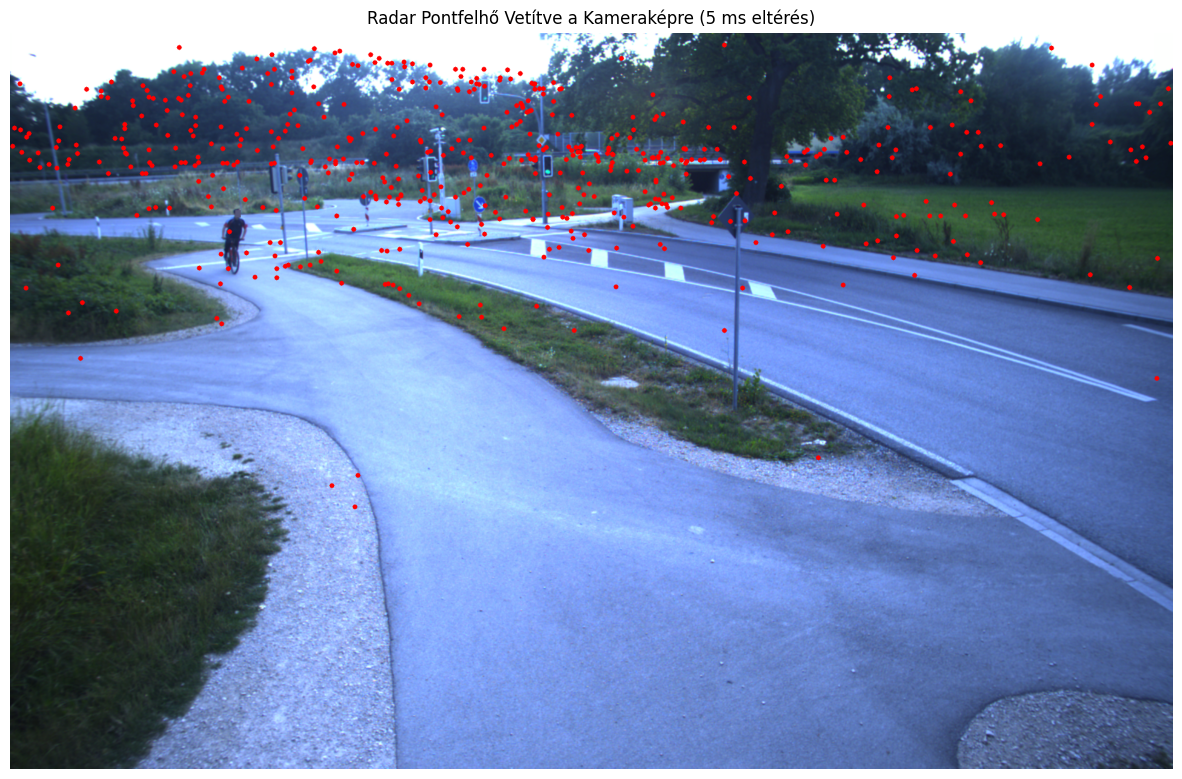

In [19]:
import numpy as np
import json
import cv2
from pypcd4 import PointCloud
import matplotlib.pyplot as plt
import os # Az os.path.join-hoz

# --- 1. Útvonalak (Szinkronizált fájlok) ---
calib_path = r"C:\Users\janko\Downloads\INFRA-3DRC-Dataset\INFRA-3DRC_scene-01\calibration.json"
# 🎯 ÚJ SZINKRONIZÁLT RADAR ÚTVONAL (5 ms eltérés)
pcd_path = r"C:\Users\janko\Downloads\INFRA-3DRC-Dataset\INFRA-3DRC_scene-01\radar_01\radar_01__data\radar_01__2023-07-06-18-58-35-247.pcd" 
# 🎯 KAMERAKÉP ÚTVONAL
img_path = r"C:\Users\janko\Downloads\INFRA-3DRC-Dataset\INFRA-3DRC_scene-01\camera_01\camera_01__data\camera_01__2023-07-06-18-58-35-252.png" 

# --- 2. Kalibráció és Adatok Betöltése ---
with open(calib_path, 'r') as f:
    calib = json.load(f)
calibration_list = calib['calibration']

# Kézi beállítás a kép felbontásához
WIDTH = 1920 
HEIGHT = 1080 

# Radar Pontfelhő Betöltése
pc = PointCloud.from_path(pcd_path)
points_radar = np.vstack((pc.pc_data['x'], pc.pc_data['y'], pc.pc_data['z'])).T
N = points_radar.shape[0]

# Mátrixok Betöltése
intrinsic_data = calibration_list[4]
K = np.array(intrinsic_data['k']).reshape((3, 3)) 
extrinsic_data = calibration_list[1]
T_radar_to_cam = np.array(extrinsic_data['T']) 

# Kamerakép Betöltése
img = cv2.imread(img_path)
if img is None:
    raise FileNotFoundError(f"Hiba: Nem sikerült betölteni a képet: {img_path}")

# --- 3. Vetítési Matematika ---
points_hom_radar = np.hstack([points_radar, np.ones((N, 1))])
points_hom_cam = (T_radar_to_cam @ points_hom_radar.T).T 
points_cam = points_hom_cam[:, :3] 

x_cam = points_cam[:, 0]
y_cam = points_cam[:, 1]
z_cam = points_cam[:, 2] 

# Szűrés és vetítés
valid_indices = z_cam > 0.1 
x_valid = x_cam[valid_indices]
y_valid = y_cam[valid_indices]
z_valid = z_cam[valid_indices]

u = K[0, 0] * (x_valid / z_valid) + K[0, 2] 
v = K[1, 1] * (y_valid / z_valid) + K[1, 2] 

# Végleges pixel koordináták és szűrés
u_final = np.round(u).astype(int)
v_final = np.round(v).astype(int)
on_image_indices = (u_final >= 0) & (u_final < WIDTH) & (v_final >= 0) & (v_final < HEIGHT)
u_final = u_final[on_image_indices]
v_final = v_final[on_image_indices]

# --- 4. Megjelenítés ---
points_2d = np.stack([u_final, v_final], axis=1)

# Pontok rajzolása a képre
for u, v in points_2d:
    cv2.circle(img, (u, v), 4, (0, 0, 255), -1) # Piros pontok
    
print(f"✅ Sikeresen vetített radar pontok: {len(u_final)}/{N} db, {min_diff_ms:.0f} ms eltéréssel.")

# Megjelenítés Matplotlib-el
img_rgb_final = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(15, 10))
plt.imshow(img_rgb_final)
plt.axis("off")
plt.title(f"Radar Pontfelhő Vetítve a Kameraképre (5 ms eltérés)")
plt.show()

✅ Adatok és mátrixok betöltve. Kezdődik a vetítés...
✅ Sikeresen vetített radar pontok: 541/617 db, 5 ms eltéréssel (X/Y negálva).


C:\Users\janko\AppData\Local\Temp\ipykernel_17436\2707984386.py:81: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap('viridis')


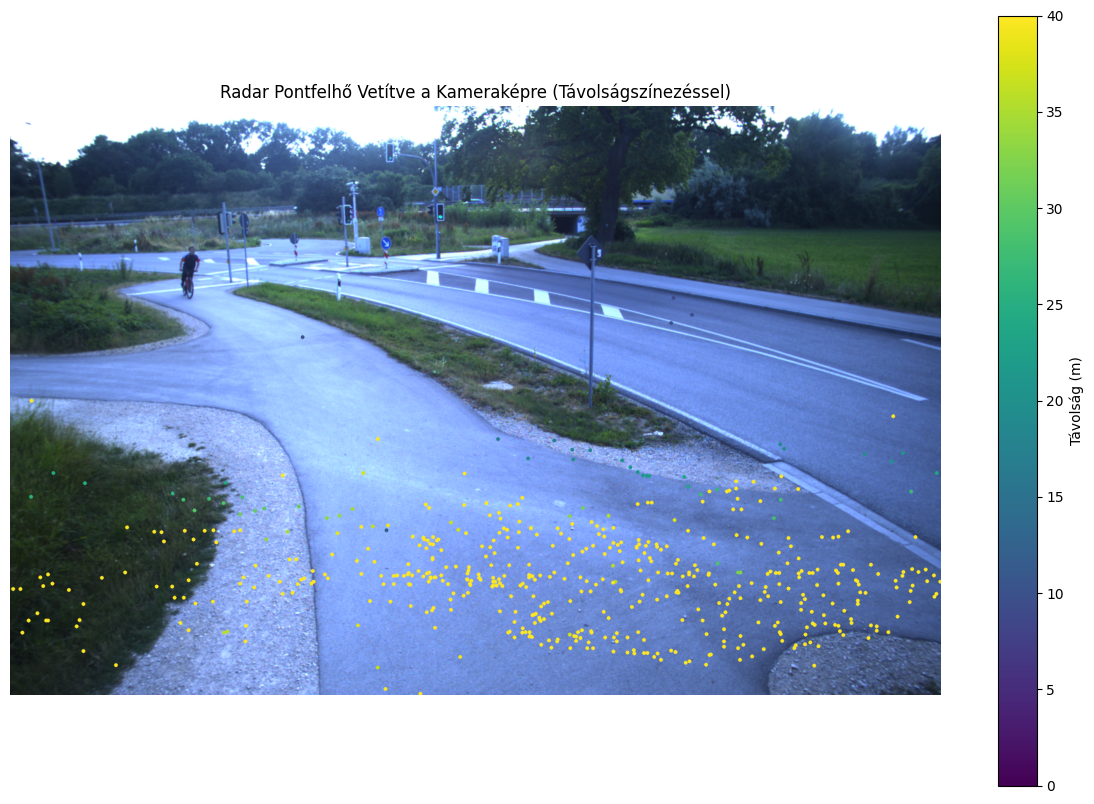

In [2]:
import numpy as np
import json
import cv2
from pypcd4 import PointCloud
import matplotlib.pyplot as plt
from matplotlib import cm # Színskálákhoz

# --- 1. Útvonalak és Adatok (Szinkronizált) ---
calib_path = r"C:\Users\janko\Downloads\INFRA-3DRC-Dataset\INFRA-3DRC_scene-01\calibration.json"
pcd_path = r"C:\Users\janko\Downloads\INFRA-3DRC-Dataset\INFRA-3DRC_scene-01\radar_01\radar_01__data\radar_01__2023-07-06-18-58-35-247.pcd" 
img_path = r"C:\Users\janko\Downloads\INFRA-3DRC-Dataset\INFRA-3DRC_scene-01\camera_01\camera_01__data\camera_01__2023-07-06-18-58-35-252.png" 

WIDTH = 1920 
HEIGHT = 1216
min_diff_ms = 5 

# Kalibráció és Mátrixok Betöltése
with open(calib_path, 'r') as f:
    calib = json.load(f)
calibration_list = calib['calibration']
intrinsic_data = calibration_list[4]
K = np.array(intrinsic_data['k']).reshape((3, 3)) 
extrinsic_data = calibration_list[1]
T_radar_to_cam = np.array(extrinsic_data['T']) 

# Radar Pontfelhő Betöltése
pc = PointCloud.from_path(pcd_path)
points_radar = np.vstack((pc.pc_data['x'], pc.pc_data['y'], pc.pc_data['z'])).T
N = points_radar.shape[0]

# Kamerakép Betöltése
img = cv2.imread(img_path)
if img is None:
    raise FileNotFoundError(f"Hiba: Nem sikerült betölteni a képet: {img_path}")

print("✅ Adatok és mátrixok betöltve. Kezdődik a vetítés...")

# --- 3. Vetítési Matematika ---
points_hom_radar = np.hstack([points_radar, np.ones((N, 1))])
points_hom_cam = (T_radar_to_cam @ points_hom_radar.T).T 
points_cam = points_hom_cam[:, :3] 

x_cam_orig = points_cam[:, 0]
y_cam_orig = points_cam[:, 1]
z_cam = points_cam[:, 2] 

# ------------------------------------------------------------------
## ✅ HELYES KORREKCIÓ: X és Y TENGELYEK ELŐJELÉNEK FORDÍTÁSA
x_cam = -x_cam_orig 
y_cam = -y_cam_orig 
# Z (mélység) marad az eredeti!
# ------------------------------------------------------------------

# 3.2. Szűrés
valid_indices = z_cam > 0.1 
x_valid = x_cam[valid_indices]
y_valid = y_cam[valid_indices]
z_valid = z_cam[valid_indices]
points_cam_valid = points_cam[valid_indices] # A 3D pontok is kellenek a távolsághoz!

# 3.3. Intrinzikus Vetítés
u = K[0, 0] * (x_valid / z_valid) + K[0, 2] 
v = K[1, 1] * (y_valid / z_valid) + K[1, 2] 

# Végleges pixel koordináták és szűrés a képhatárokra
u_final = np.round(u).astype(int)
v_final = np.round(v).astype(int)
on_image_indices = (u_final >= 0) & (u_final < WIDTH) & (v_final >= 0) & (v_final < HEIGHT)
u_final = u_final[on_image_indices]
v_final = v_final[on_image_indices]

# ------------------------------------------------------------------
# Távolság (Euklideszi norma) számítása a 3D pontokból
distances = np.linalg.norm(points_cam_valid[on_image_indices], axis=1)

# Normalizálás és színkódolás (pl. 0-40 méter között)
MAX_DISTANCE = 40.0
normed_distances = np.clip(distances, 0, MAX_DISTANCE) / MAX_DISTANCE

# Színskálánk (pl. viridis, ahol a sárga a közeli, lila a távoli)
cmap = cm.get_cmap('viridis')
colors = cmap(normed_distances)[:, :3] # Csak az RGB érték kell (0-1 között)
colors_bgr = (colors[:, ::-1] * 255).astype(np.uint8) # BGR-re váltás (OpenCV)
# ------------------------------------------------------------------


# --- 4. Megjelenítés ---
print(f"✅ Sikeresen vetített radar pontok: {len(u_final)}/{N} db, {min_diff_ms:.0f} ms eltéréssel (X/Y negálva).")

# Pontok rajzolása a képre (távolságalapú színezéssel)
for i in range(len(u_final)):
    u, v = u_final[i], v_final[i]
    color = colors_bgr[i].tolist()
    cv2.circle(img, (u, v), 4, color, -1) 

# Megjelenítés Matplotlib-el
img_rgb_final = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(15, 10))
plt.imshow(img_rgb_final)
plt.axis("off")
plt.title(f"Radar Pontfelhő Vetítve a Kameraképre (Távolságszínezéssel)")

# Színskála hozzáadása a magyarázathoz
sm = plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin=0, vmax=MAX_DISTANCE))
sm.set_array([])
cbar = plt.colorbar(sm, ax=plt.gca())
cbar.set_label('Távolság (m)')

plt.show()